In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nbimporter
from preprocessamento import gerar_target
from preprocessamento import preprocessar
from sklearn.tree import  export_graphviz

Importing Jupyter notebook from preprocessamento.ipynb


### Carregamento dos dados, e preprocessamento

In [2]:
dados_2015 = pd.read_csv('../arquivos/2015.csv')
dados_2016 = pd.read_csv('../arquivos/2016.csv')

In [3]:
dados_2015

,Indicação de data e hora,situacao,Sexo:,Com qual cor/etnia você se identifica?,Qual o seu estado civil?,Tem filhos?,Qual a renda mensal de sua família?,Com quem você está morando atualmente?,Você está residindo em:,"Tomando como base seu local de moradia atual, qual a distância de onde reside para a universidade?",...,Quais suas expectativas com a conclusão de seu curso?,O que você espera do curso que está inciando? Quais suas expectativas?,Curso em que você está matriculado:,"Quais foram a primeira e a segunda opção de cursos que você escolheu no ENEM/Sisu, respectivamente?",Assinale as DUAS principais dificuldades que você percebeu influenciar a conclusão do curso:,Você já concluiu ou está cursando algum outro curso tecnológico ou de graduação? [Não.],"Dentre os cursos oferecidos pela UFC, aquele no qual você havia ingressado sempre foi a formação que você desejou realizar?",Unnamed: 47,Unnamed: 48,Unnamed: 49
0,5/18/2015 15:54:15,CANCELADO/DESISTÊNCIA,Masculino,NaN,Solteiro/a,Não,De 2001 até 3000 reais,Família,Zona urbana,Até 10 km,...,Gostaria de ganhar dinheiro com o meu próprio ...,"Eu espero que seja um curso abrangente, que en...",Engenharia de computação,Eng. de Computação - UFC Campus Quixadá,Eng. de Computação - UFC Campus Quixadá,Eng. de Computação - UFC Campus Quixadá,Eng. de Computação - UFC Campus Quixadá,Eng. de Computação - UFC Campus Quixadá,Eng. de Computação - UFC Campus Pici,"Dificuldade de Transporte, Dificuldade de Orga..."
1,5/18/2015 15:55:03,ATIVO,Masculino,NaN,Solteiro/a,Não,Até 1000 reais,Sozinho,Zona urbana,Até 10 km,...,Gostaria de ganhar dinheiro com o meu próprio ...,Adquirir conhecimentos sobre a área escolhida ...,Engenharia de computação,"ENGENHARIA DE COMPUTAÇÃO , ENGENHARIA DA COMPU...","Dificuldade de Organizar Horários de Estudos, ...",NaN,NaN,NaN,NaN,NaN
2,5/18/2015 15:56:19,ATIVO,Masculino,NaN,Solteiro/a,Não,De 2001 até 3000 reais,Família,Zona urbana,Até 10 km,...,Gostaria de prestar um concurso e trabalhar no...,Espero que consiga se formar ao longo do perio...,Muitas expectativas na area da robotica.,Engenharia de computação,Engenharia de Computação/Ciencia da Computação,"Dificuldade de Organizar Horários de Estudos, ...",NaN,NaN,NaN,NaN
3,5/18/2015 15:58:28,CANCELADO/ABANDONO,Masculino,NaN,Solteiro/a,Não,De 1001 até 2000 reais,Sozinho,Zona urbana,Até 10 km,...,"Gostaria de seguir a vida acadêmica (mestrado,...",Que seja interessante.,Engenharia de computação,Engenharia de computação e sistemas de informação,"Problemas Financeiros, Dificuldade com o apren...",NaN,NaN,NaN,NaN,NaN
4,5/18/2015 15:59:01,ATIVO,Masculino,NaN,Solteiro/a,Não,De 2001 até 3000 reais,Família,Zona urbana,Entre 50 km e 100 km,...,Gostaria de prestar um concurso e trabalhar no...,"Espero um grande embasamento tanto teórico, qu...",Engenharia de computação,Eng. de Computação/ Ciência da Computação,"Dificuldade de Organizar Horários de Estudos, ...",NaN,NaN,NaN,NaN,NaN
5,5/18/2015 15:59:04,CANCELADO/ABANDONO,Masculino,NaN,Solteiro/a,Não,De 2001 até 3000 reais,Amigos,Zona urbana,Até 10 km,...,Gostaria de ganhar dinheiro com o meu próprio ...,Espero aproveitar ao máximo a oportunidade que...,Engenharia de computação,engenharia de petróleo e engenharia de computação,"Dificuldade de Organizar Horários de Estudos, ...",NaN,NaN,NaN,NaN,NaN
6,5/18/2015 16:00:02,ATIVO,Masculino,NaN,Solteiro/a,Não,Até 1000 reais,Amigos,Zona urbana,Entre 10 km e 25 km,...,Gostaria de conseguir um bom emprego.,Um curso promissor. Isso se deve ao elevado gr...,Engenharia de computação,Engenharia da computação/ engenharia de software,"Problemas Financeiros, Problemas Familiares",NaN,NaN,NaN,NaN,NaN
7,5/18/2015 16:01:59,ATIVO,Masculino,NaN,Solteiro/a,Não,De 2001 até 3000 reais,Amigos,Zona urbana,Até 10 km,...,Gostaria de conseguir um bom emprego.,As minhas expectativa são boas. Muito estudo.,Engenharia de computação,Ciencia da Computação,"Dificuldade de Organizar Horários de Estudos, ...",NaN,NaN,NaN,NaN,NaN
8,5/18/2015 16:03:02,ATIVO,Feminino,Na

In [4]:
df_2015 = preprocessar(dados_2015)
df_2016 = preprocessar(dados_2016)

frames = [df_2015, df_2016]

data_frame = pd.concat(frames)

In [5]:
target_2015 = gerar_target(dados_2015)
target_2016 = gerar_target(dados_2016)

targets = [target_2015, target_2016]

target = pd.concat(targets)

In [6]:
data_frame.shape

(473, 10)

In [7]:
cont = 0
for coluna in data_frame.columns:
    print("{} - {}".format(cont, coluna))
    cont += 1

0 - filhos
1 - afinidade_linguagens
2 - afinidade_humanas
3 - afinidade_matematica
4 - afinidade_natureza
5 - motivacao_curso
6 - tarefa_durante_curso
7 - realizacao_profissional
8 - concluir_curso_nessa_instituicao
9 - nao_mudaria_de_curso


### Gerando Feature Importace com Extra Tree Classifier

In [8]:
from sklearn.ensemble import ExtraTreesClassifier

In [9]:
forest = ExtraTreesClassifier()

In [10]:
import os

In [11]:
os.system('dot -Tpng tree.dot -o tree.png')

32512

In [12]:
forest.fit(data_frame, target)

/home/igor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [13]:
importances_clf = forest.feature_importances_

In [14]:
std_clf = np.std([forest.feature_importances_ for tree in forest.estimators_],axis=0)

In [15]:
indices_clf = np.argsort(importances_clf)[::-1]

Feature ranking:
1. feature 1 (0.140923)
2. feature 3 (0.114396)
3. feature 8 (0.112096)
4. feature 2 (0.110592)
5. feature 7 (0.104169)
6. feature 9 (0.103461)
7. feature 6 (0.102833)
8. feature 4 (0.098468)
9. feature 5 (0.098259)
10. feature 0 (0.014803)


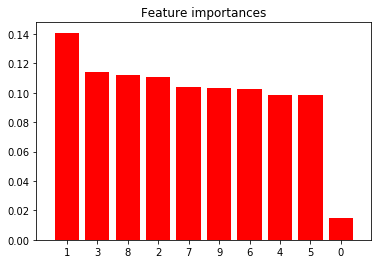

In [16]:
print("Feature ranking:")

for f in range(data_frame.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_clf[f], importances_clf[indices_clf[f]]))
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(data_frame.shape[1]), importances_clf[indices_clf],
       color="r", yerr=std_clf[indices_clf], align="center")
plt.xticks(range(data_frame.shape[1]), indices_clf)
plt.xlim([-1, data_frame.shape[1]])
plt.show()
# """
# print("Feature ranking:")

# for f in range(dados_2016.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices_clf[f], importances_clf[indices_clf[f]]))

# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(dados_2016.shape[1]), importances_clf[indices_clf],
#        color="r", yerr=std_clf[indices_clf], align="center")
# plt.xticks(range(dados_2016.shape[1]), indices_clf)
# plt.xlim([-1, dados_2016.shape[1]])
# plt.show()
# """

In [17]:
export_graphviz(forest.estimators_[0], feature_names=data_frame.columns, filled=True, rounded=True, max_depth=3, class_names=['evadido', 'ativo'])

/home/igor/anaconda3/lib/python3.6/site-packages/sklearn/tree/export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


### Gerando Feature Importace com RandomForest

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
clf = RandomForestClassifier(max_depth=10, random_state=0)

In [20]:
clf.fit(data_frame, target)

/home/igor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [21]:
importances_rf = clf.feature_importances_

In [22]:
std_rf = np.std([clf.feature_importances_ for tree in clf.estimators_],axis=0)

In [23]:
indices_rf = np.argsort(importances_rf)[::-1]

Feature ranking:
1. feature 8 (0.140057)
2. feature 5 (0.123455)
3. feature 1 (0.121594)
4. feature 4 (0.115908)
5. feature 3 (0.112501)
6. feature 7 (0.111324)
7. feature 9 (0.101382)
8. feature 6 (0.096448)
9. feature 2 (0.064751)
10. feature 0 (0.012581)


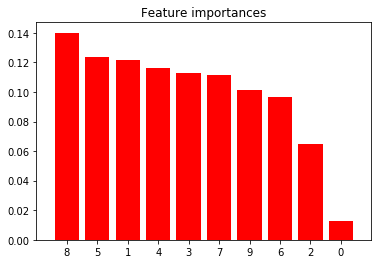

In [24]:
print("Feature ranking:")

for f in range(data_frame.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_rf[f], importances_rf[indices_rf[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(data_frame.shape[1]), importances_rf[indices_rf],
       color="r", yerr=std_rf[indices_rf], align="center")
plt.xticks(range(data_frame.shape[1]), indices_rf)
plt.xlim([-1, data_frame.shape[1]])
plt.show()

### Gerando Feature Importace com RandomTreesEmbedding

In [25]:
from sklearn.ensemble import RandomTreesEmbedding

In [26]:
rte = RandomForestClassifier(n_estimators=10, random_state=0, max_depth=3)

In [27]:
rte.fit(data_frame, target)

/home/igor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [28]:
importances = rte.feature_importances_

In [29]:
std = np.std([rte.feature_importances_ for tree in rte.estimators_],axis=0)

In [30]:
print(std)

[8.67361738e-19 3.46944695e-18 6.93889390e-18 0.00000000e+00
 3.46944695e-18 2.77555756e-17 1.38777878e-17 0.00000000e+00
 2.77555756e-17 0.00000000e+00]


In [31]:
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 7 (0.219072)
2. feature 9 (0.206055)
3. feature 5 (0.199300)
4. feature 8 (0.159638)
5. feature 6 (0.071200)
6. feature 2 (0.049465)
7. feature 3 (0.045794)
8. feature 4 (0.022619)
9. feature 1 (0.020604)
10. feature 0 (0.006253)


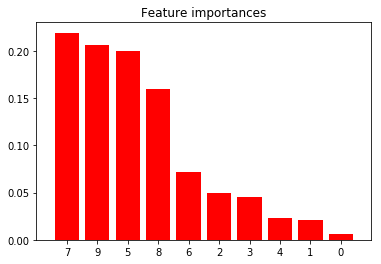

In [32]:
print("Feature ranking:")

for f in range(data_frame.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(data_frame.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(data_frame.shape[1]), indices)
plt.xlim([-1, data_frame.shape[1]])
plt.show()

In [33]:
cont = 0
for coluna in data_frame.columns:
    print("{} - {}".format(cont, coluna))
    cont += 1

0 - filhos
1 - afinidade_linguagens
2 - afinidade_humanas
3 - afinidade_matematica
4 - afinidade_natureza
5 - motivacao_curso
6 - tarefa_durante_curso
7 - realizacao_profissional
8 - concluir_curso_nessa_instituicao
9 - nao_mudaria_de_curso
